# Decision Trees

## Objectives:  

Develop a classification model using Decision Tree algorithm.

## About the dataset  

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.

In [2]:
#Importing necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
#Importing data
my_data = pd.read_csv('drug200.csv')
my_data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


### Preprocessing Data

In [28]:
#Features selected by selecting all but the last column
X = my_data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
#Classification selected by selecting last column
Y = my_data[['Drug']]
X[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Some features in this dataset are categorical such as Sex or BP. Unfortunately, Sklearn Decision Trees do not handle 
categorical variables. But still we can convert these features to dummy/indicator values. 

In [29]:
from sklearn import preprocessing

#Transforming the sex column using LableEncoder.
#This gives values to M/F in sex column as 0/1
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

#Transforming the bp column using LableEncoder.
#This gives values to HIGH/NORMAL/LOW in bp column as 0/1/2
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

#Transforming the Cholesterol column using LableEncoder.
#This gives values to HIGH/NORMAL in Cholesterol column as 0/1
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

### Modeling Decision Tree and Predicting 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

#Modeling
dec_tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)

#Fitiing the parameters
dec_tree.fit(X_train,Y_train)

#Prediction
pred_tree = dec_tree.predict(X_test)
print(pred_tree[:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


### Evaluation

In [37]:
from sklearn import metrics
jaccard_score = metrics.accuracy_score(pred_tree, Y_test)
jaccard_score

0.9833333333333333

[Text(523.125, 489.24, 'X[4] <= 14.615\nentropy = 1.929\nsamples = 140\nvalue = [16, 11, 11, 33, 69]'),
 Text(418.5, 380.52000000000004, 'X[2] <= 0.5\nentropy = 1.832\nsamples = 71\nvalue = [16, 11, 11, 33, 0]'),
 Text(209.25, 271.8, 'X[0] <= 50.5\nentropy = 0.975\nsamples = 27\nvalue = [16, 11, 0, 0, 0]'),
 Text(104.625, 163.08000000000004, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(313.875, 163.08000000000004, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(627.75, 271.8, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 44\nvalue = [0, 0, 11, 33, 0]'),
 Text(523.125, 163.08000000000004, 'X[2] <= 1.5\nentropy = 0.998\nsamples = 21\nvalue = [0, 0, 11, 10, 0]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(627.75, 54.360000000000014, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(732.375, 163.08000000000004, 'entropy = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]'),
 Text(627.75, 380.5200000

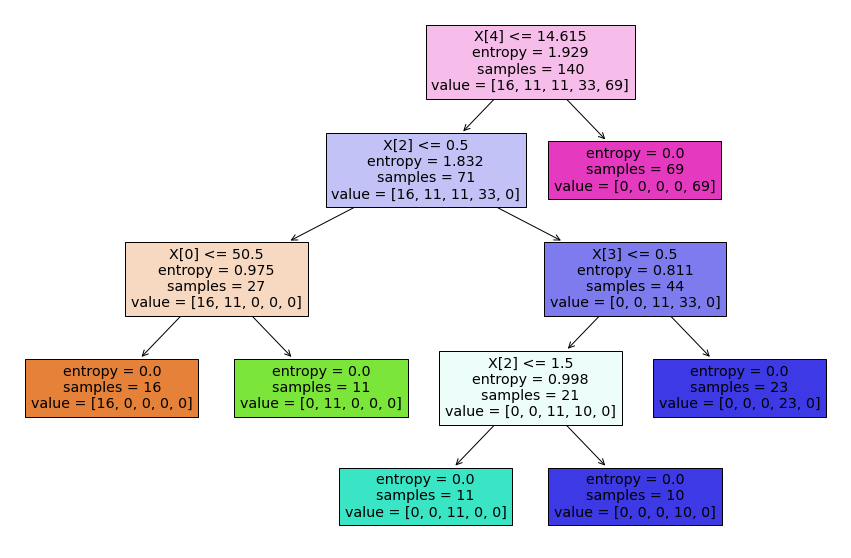

In [38]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(dec_tree,filled=True)
